In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 이미지 전처리 객체 선언
idg = ImageDataGenerator()

# 경로 지정
original_dir = './datasets/original/'
# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
original_generator = idg.flow_from_directory(original_dir,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical', 
                                             shuffle=True)

# 각 클랙스의 이름과 인덱스 출력
print(original_generator.class_indices)

Found 600 images belonging to 3 classes.
{'Bellygom': 0, 'brokenbear': 1, 'jokebear': 2}


In [2]:
# 각 타겟의 타겟 이름을 담기 위해 key와 value의 순서 변경하여 타겟의 고유값을 저장
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'Bellygom', 1: 'brokenbear', 2: 'jokebear'}

In [3]:
# 각 타겟의 이름 담을 초기 list 선언
original_target_names = []

# 각 타겟의 인덱스를 확인하여 인덱스에 맞는 타겟 이름을 담아주기
for target in original_generator.classes:
    original_target_names.append(target_name[target])

# 각 타겟의 개수 확인
print(original_target_names.__len__())

600


In [4]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성 후
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)

file_paths target_names  targets
0      ./datasets/original/Bellygom/Bellygom1.png     Bellygom        0
1     ./datasets/original/Bellygom/Bellygom10.png     Bellygom        0
2    ./datasets/original/Bellygom/Bellygom100.png     Bellygom        0
3    ./datasets/original/Bellygom/Bellygom101.png     Bellygom        0
4    ./datasets/original/Bellygom/Bellygom102.png     Bellygom        0
..                                            ...          ...      ...
595   ./datasets/original/jokebear/jokebear95.png     jokebear        2
596   ./datasets/original/jokebear/jokebear96.png     jokebear        2
597   ./datasets/original/jokebear/jokebear97.png     jokebear        2
598   ./datasets/original/jokebear/jokebear98.png     jokebear        2
599   ./datasets/original/jokebear/jokebear99.png     jokebear        2

[600 rows x 3 columns]

In [5]:
from sklearn.model_selection import train_test_split

# 검증용 데이터 세트 분리
train_images, test_images, train_targets, test_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, random_state=124)

In [6]:
from sklearn.model_selection import train_test_split

# 검증용 데이터 세트 분리
train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

# 타겟 비중 확인
print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
1    128
0    128
2    128
Name: count, dtype: int64
targets
2    32
1    32
0    32
Name: count, dtype: int64
targets
0    40
1    40
2    40
Name: count, dtype: int64


In [7]:
# import shutil
# import os.path

# # 데이터 세트 경로 지정
# base_dir = './datasets/'

# for filepath in train_images:
#     # 이미지 파일을 복사할 디렉터리의 경로 저장
#     destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

#     # 디렉터리가 없는 경우 해당 디렉터리를 생성
#     if not os.path.exists(destination):
#         os.makedirs(destination)

#     # 이미지 파일을 디렉터리로 복사
#     shutil.copy2(filepath, destination)

In [8]:
# import shutil
# import os.path

# # 데이터 세트 경로 지정
# base_dir = './datasets/'

# for filepath in validation_images:
#     # 이미지 파일을 복사할 디렉터리의 경로 저장
#     destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

#     # 디렉터리가 없는 경우 해당 디렉터리를 생성
#     if not os.path.exists(destination):
#         os.makedirs(destination)

#     # 이미지 파일을 디렉터리로 복사
#     shutil.copy2(filepath, destination)

In [9]:
# import shutil
# import os.path

# # 데이터 세트 경로 지정
# base_dir = './datasets/'

# for filepath in test_images:
#     # 이미지 파일을 복사할 디렉터리의 경로 저장
#     destination = base_dir + 'test/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

#     # 디렉터리가 없는 경우 해당 디렉터리를 생성
#     if not os.path.exists(destination):
#         os.makedirs(destination)

#     # 이미지 파일을 디렉터리로 복사
#     shutil.copy2(filepath, destination)

In [10]:
# 인덱스 번호를 대조하여 각 데이터 프레임 나누기
train_df = original_df.loc[train_images.index].reset_index(drop=True)
validation_df = original_df.loc[validation_images.index].reset_index(drop=True)
test_df = original_df.loc[test_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

384
96
120


In [11]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(384, 3)
(96, 3)
(120, 3)


In [12]:
from glob import glob
import os

# 경로 지정
train_dir = './datasets/train/'
validation_dir = './datasets/validation/'
test_dir = './datasets/test/'

# 해당 경로를 통해 이미지 폴더를 찾아옴
directories = glob(os.path.join(train_dir, '*'))

In [13]:
# 폴더 이름 저장할 초기 list 생성
directory_names = []

for directory in directories:
    # 디렉토리의 이름을 찾아와서 list에 저장
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['Bellygom', 'brokenbear', 'jokebear']


### 📊 유사도 예측

In [14]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 데이터 세트 생성 class 정의
class Dataset(Sequence):
    # 클래스의 초기화
    # 경로, 타겟, 배치 크기, albumentations 객체, 전처리 하마, 셔플 여부를 인자로 받음
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        # shuffle True 시 진행:
        if self.shuffle:
            # epoch 끝날 때마다 호출
            self.on_epoch_end()

    # 전체 데이터 세트 크기 반환
    def __len__(self):
        # 하나의 배치 사이즈에 필요한 데이터 개수 리턴
        return int(np.ceil(len(self.targets) / self.batch_size))

    # 주어진 인덱스에 해당하는 배치 반환
    def __getitem__(self, index):
        # 파일 경로와 타겟 데이터를 배치 크기만큼 자르고, 이미지를 불러와 처리한 후 배치로 반환
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 데이터 배치 저장
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 데이터 수만큼 반복
        for i in range(file_paths_batch.shape[0]):
            # RGB로 색상 형식을 변환하여 이미지 가져오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 이미지 크기 조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # albumentations이 있다면:
            if self.aug is not None:
                # Augmentor 객체로 이미지 변환
                image = self.aug(image=image)['image']

            # 전처리 함수가 있다면:
            if self.preprocess is not None:
                # 이미지 전처리 진행
                image = self.preprocess(image)

            # 결과 배치에 이미지를 저장
            results_batch[i] = image

        # 결과 배치와 타겟 배치를 반환
        return results_batch, targets_batch
        
    def on_epoch_end(self):
        # shuffle 옵션이 켜져있다면, 데이터를 섞기
        if self.shuffle:
            # epoch 끝날 때마다 데이터 섞기
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [15]:
def create_dataset(paths, targets, BATCH_SIZE, shuffle=True):   
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   shuffle=True)

In [16]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

In [17]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=4, title=None):    
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

In [18]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions as vgg16_decode_predictions
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions as resnet50v2_decode_predictions
from tensorflow.keras.applications.xception import Xception, decode_predictions as xception_decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions as mobilenetv2_decode_predictions

def predict_and_display(images, titles, model_name):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=len(images))

    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16()
        decode_predictions = vgg16_decode_predictions
        target_size = (224, 224)
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2()
        decode_predictions = resnet50v2_decode_predictions
        target_size = (224, 224)
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception()
        decode_predictions = xception_decode_predictions
        target_size = (299, 299)
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2()
        decode_predictions = mobilenetv2_decode_predictions
        target_size = (224, 224)

    for i, image in enumerate(images):
        # 모델 입력 크기에 맞게 이미지 크기 조정
        resized_image = cv2.resize(image, target_size)
        # 이미지 배열로 변환
        image_array = img_to_array(resized_image)
        # 차원 확장 (배열의 첫 번째 차원 확장)
        image_array = np.expand_dims(image_array, axis=0)
        # 이미지 예측
        prediction = model.predict(image_array)
        # 이미지 분류 모델의 예측 결과를 해석
        target = decode_predictions(prediction)
        # 높은 확률로 예측 된 클래스 이름과 확률
        predicted_class = target[0][0][1]
        predicted_probability = np.round(target[0][0][2] * 100, 2)
        
        # 이미지와 예측 결과 표시
        axs[i].imshow(image.astype('int'))
        axs[i].axis('off')
        axs[i].set_title(f"{predicted_class}\n{predicted_probability}%")

        print(target)

In [19]:
import albumentations as A

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 각 클래스에서 하나씩 이미지를 샘플링하여 균등한 배치 구성
sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))

# 데이터 경로 및 타겟 담기 (get_dummies를 통해 원-핫 인코딩 진행)
sampled_file_paths = sampled_df['file_paths'].values
sampled_targets = pd.get_dummies(sampled_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)

In [20]:
# datasets 객체에서 배치 이미지를 불러온 후 각 변수에 저장
# iter: 반복 가능한 객체를 이터레이터(값을 순차적으로 반환하는 객체)로 변환
# next: 이터레이터 객체에서 값을 하나씩 가져오고 가져올 값이 없다면 StopIteration 예외 발생 
files_batch, targets_batch = next(iter(dataset))
# 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
print(files_batch.shape, targets_batch.shape)

(3, 244, 244, 3) (3, 3)


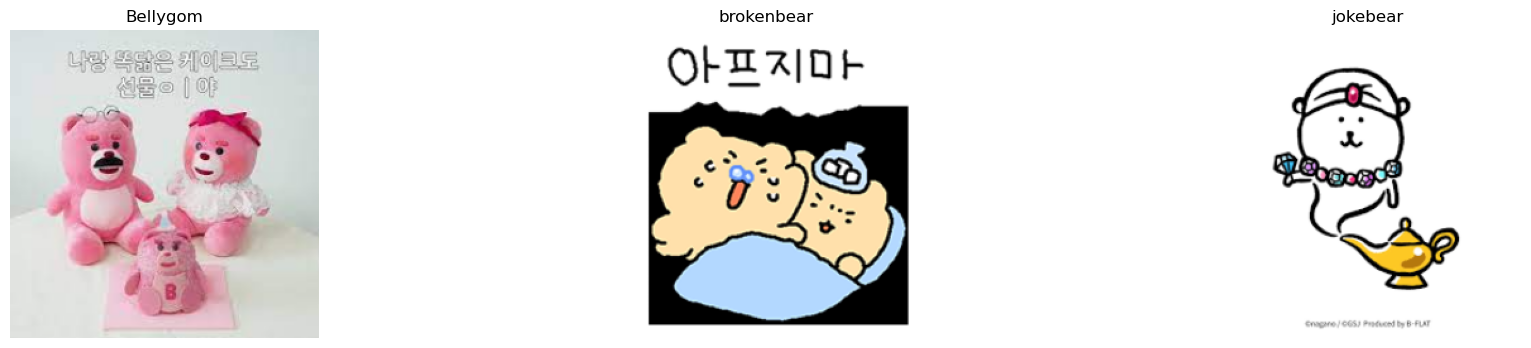

In [21]:
# # 타겟 비중
# print(test_df.groupby(by=['target_names', 'targets']).count())

# 이미지 제목 생성
titles = [target_name[np.argmax(target)] for target in targets_batch]

# 정답 출력
show_images(files_batch, ncols=3, title=titles)

vgg16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
[[('n04579432', 'whistle', 0.23873094), ('n04127249', 'safety_pin', 0.14421427), ('n03476684', 'hair_slide', 0.09068795), ('n03291819', 'envelope', 0.08062816), ('n06359193', 'web_site', 0.054004952)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
[[('n04116512', 'rubber_eraser', 0.8272323), ('n03476684', 'hair_slide', 0.04326115), ('n03908714', 'pencil_sharpener', 0.04063812), ('n04118776', 'rule', 0.01294623), ('n04127249', 'safety_pin', 0.012210425)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
[[('n02786058', 'Band_Aid', 0.3797677), ('n03476684', 'hair_slide', 0.14711219), ('n06359193', 'web_site', 0.09407577), ('n03595614', 'jersey', 0.08836152), ('n02834397', 'bib', 0.025463916)]]


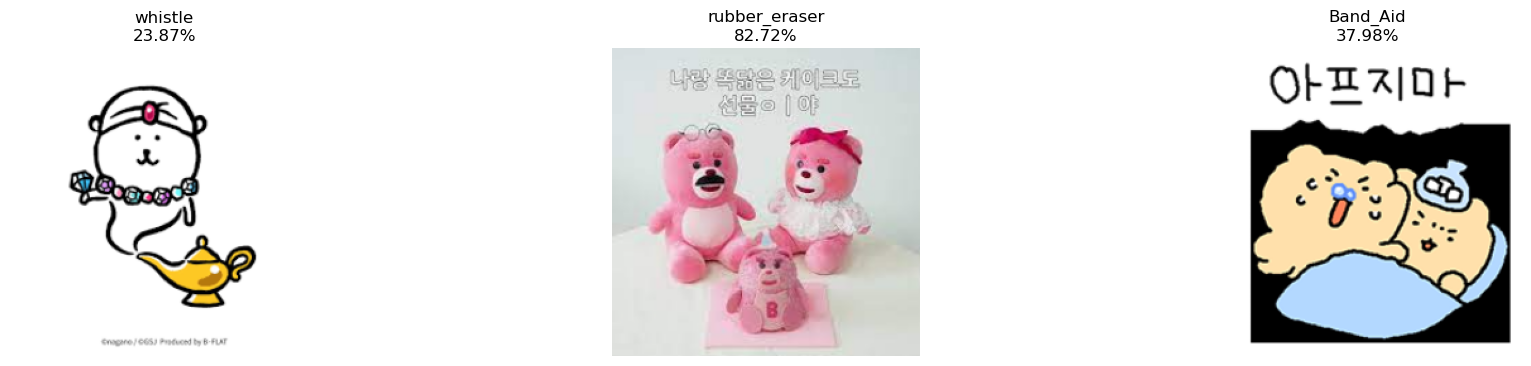

In [22]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

# 예측 모델 출력
print('vgg16')
predict_and_display(files_batch, titles, 'vgg16')

resnet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[('n02089973', 'English_foxhound', 1.0), ('n07613480', 'trifle', 5.322603e-08), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
[[('n02123597', 'Siamese_cat', 1.0), ('n02089973', 'English_foxhound', 2.6945113e-11), ('n07613480', 'trifle', 8.9377715e-12), ('n01855032', 'red-breasted_merganser', 1.1682592e-36), ('n15075141', 'toilet_tissue', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[[('n02089973', 'English_foxhound', 1.0), ('n02123597', 'Siamese_cat', 1.2984638e-13), ('n15075141', 'toilet_tissue', 0.0), ('n02321529', 'sea_cucumber', 0.0), ('n02391049', 'zebra', 0.0)]]


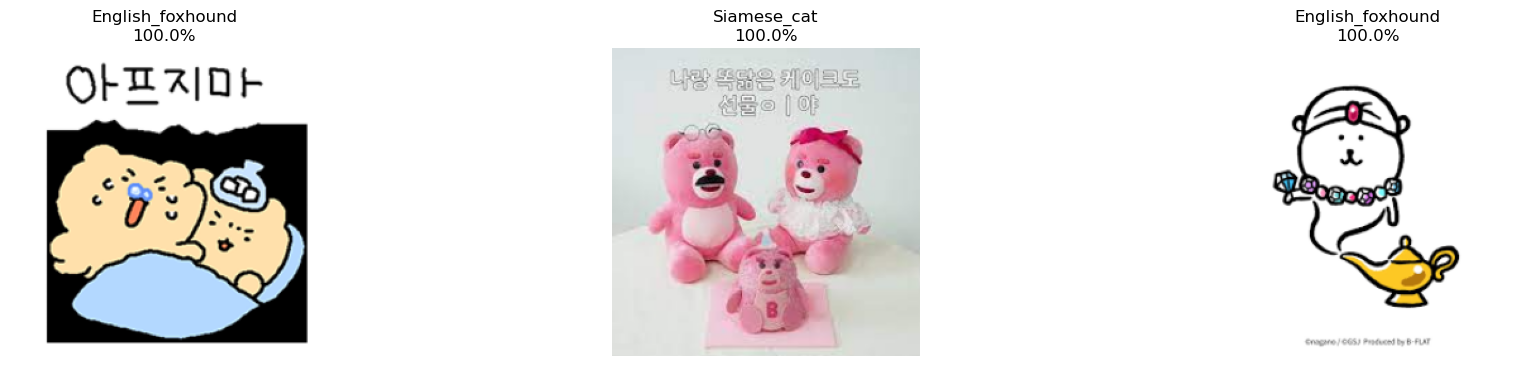

In [23]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('resnet50')
predict_and_display(files_batch, titles, 'resnet50')

xception
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03775546', 'mixing_bowl', 1.0), ('n02916936', 'bulletproof_vest', 3.857085e-13), ('n03942813', 'ping-pong_ball', 7.0267096e-15), ('n04380533', 'table_lamp', 3.4486665e-15), ('n03291819', 'envelope', 1.737182e-17)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
[[('n03775546', 'mixing_bowl', 0.9999999), ('n04127249', 'safety_pin', 1.6784072e-07), ('n15075141', 'toilet_tissue', 0.0), ('n02395406', 'hog', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
[[('n03775546', 'mixing_bowl', 0.9999876), ('n04127249', 'safety_pin', 1.2418316e-05), ('n15075141', 'toilet_tissue', 0.0), ('n02395406', 'hog', 0.0), ('n02389026', 'sorrel', 0.0)]]


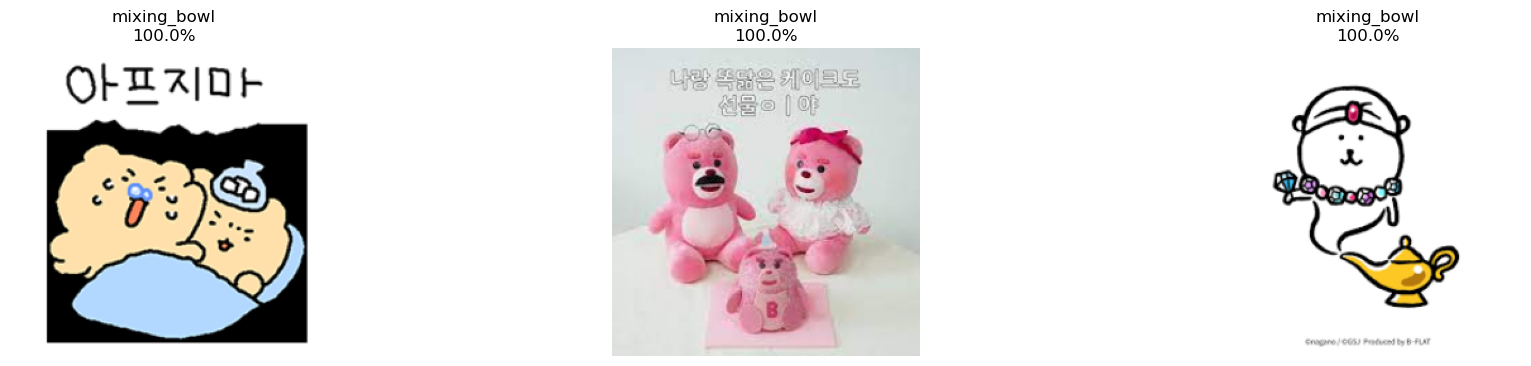

In [24]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('xception')
predict_and_display(files_batch, titles, 'xception')

mobilenet
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03065424', 'coil', 0.11608944), ('n03291819', 'envelope', 0.08134556), ('n06359193', 'web_site', 0.04682368), ('n04589890', 'window_screen', 0.033731747), ('n02999410', 'chain', 0.03126997)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[('n04209239', 'shower_curtain', 0.43203485), ('n04152593', 'screen', 0.07440124), ('n03637318', 'lampshade', 0.043382857), ('n02971356', 'carton', 0.040606596), ('n03916031', 'perfume', 0.02443143)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[('n03291819', 'envelope', 0.19879179), ('n06359193', 'web_site', 0.09929177), ('n03938244', 'pillow', 0.072774194), ('n15075141', 'toilet_tissue', 0.043376923), ('n06596364', 'comic_book', 0.037221868)]]


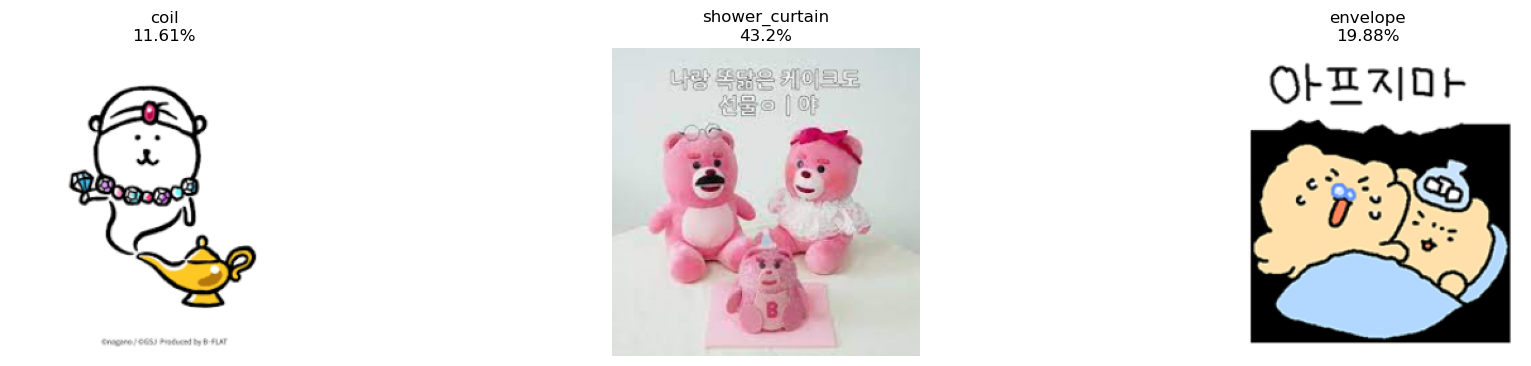

In [25]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('mobilenet')
predict_and_display(files_batch, titles, 'mobilenet')

In [26]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet50v2_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetv2_preprocess_input

def create_dataset(paths, targets, BATCH_SIZE, preprocess_input, shuffle=True):
    # VGG16 선택
    if preprocess_input == 'vgg16':
        preprocess_input = vgg_preprocess_input
    # ResNet50V2 선택
    elif preprocess_input == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        preprocess_input = resnet50v2_preprocess_input
    # Xception 선택
    elif preprocess_input == 'xception': # Inception을 기초로 한 모델
        preprocess_input = xception_preprocess_input
    # preprocess_input 선택
    elif preprocess_input == 'mobilenet':
        preprocess_input = mobilenetv2_preprocess_input
        
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   preprocess=preprocess_input,
                   shuffle=True)

In [27]:
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 모델 훈련 후 예측 이미지 출력
def predict_show_images(images, ncols=4, nrows=2, title=None, IMAGE_SIZE=IMAGE_SIZE):
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 8))
    axes = axes.flatten()

    for i, image in enumerate(images):
        # 모델 입력 크기에 맞게 이미지 크기 조정
        resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        # 이미지 배열로 변환
        image_array = img_to_array(resized_image)
        # 차원 확장 (배열의 첫 번째 차원 확장)
        image_array = np.expand_dims(image_array, axis=0)

        # 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
        predicted_probabilities = model.predict(image_array, batch_size=BATCH_SIZE)[0]
        predicted_class_index = np.argmax(predicted_probabilities)
        predicted_class_name = directory_names[predicted_class_index]
        predicted_probability = predicted_probabilities[predicted_class_index]

        if i < ncols * nrows:
            # 이미지와 예측 결과 표시
            axes[i].imshow(image.astype('int'))
            axes[i].axis('off')
            # axes[i].set_title(f"정답: {title[i]}\n예측: {predicted_class_name}\n확률: {predicted_probability}%")
            axes[i].set_title(f"예측: {predicted_class_name}\n확률: {predicted_probability:.4f}%")
    
    plt.tight_layout()
    plt.show()

### 🌟 1Cycle

In [28]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2 # 작은 장치에서도 성능을 끌어올릴 수 있는 모델

# 모델 생성 함수 선언
# model_name: 사전 훈련 모델 이름, verbose: 모델 요약 출력 여부
def create_model(model_name='vgg16', verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output

    # 분류기
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # hidden layer: 뉴런과 ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)

    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # output layer: 3개의 뉴런과 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(3, activation='softmax', name='output')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=input_tensor, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
    
    return model

In [30]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [31]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/1cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [33]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='mobilenet', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\LEGION\AppData\Local\Temp\ipykernel_23264\1980531665.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [34]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50


C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 57s 608ms/step - acc: 0.6857 - loss: 0.9522 - val_acc: 0.6146 - val_loss: 2.1637 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 582ms/step - acc: 0.8642 - loss: 0.3610 - val_acc: 0.3854 - val_loss: 11.1256 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 588ms/step - acc: 0.9407 - loss: 0.2544 - val_acc: 0.4479 - val_loss: 7.6464 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 593ms/step - acc: 0.8911 - loss: 0.3348 - val_acc: 0.7292 - val_loss: 4.3048 - learning_rate: 1.0000e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 26s 538ms/step - acc: 0.9004 - loss: 0.2728 - val_acc: 0.7917 - val_loss: 3.6642 - learning_rate: 1.0000e-04


In [35]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - acc: 0.9021 - loss: 0.8696


[1.288399338722229, 0.8666666746139526]

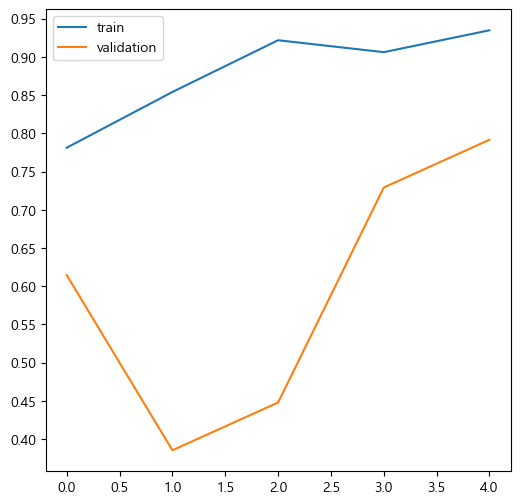

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


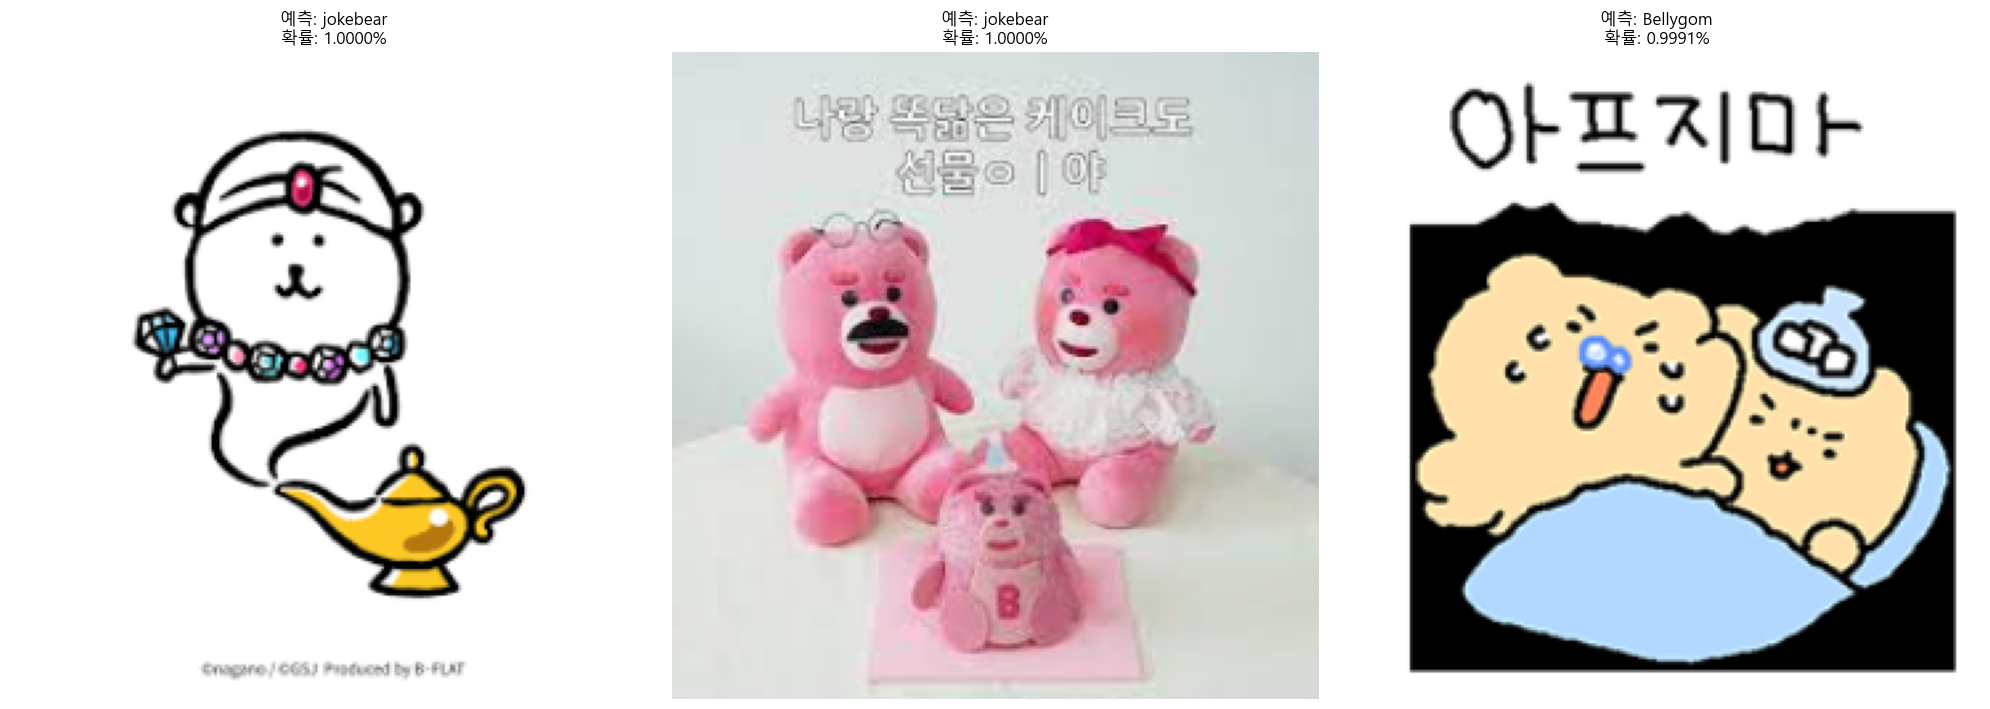

In [37]:
predict_show_images(files_batch, ncols=3, nrows=1, IMAGE_SIZE=IMAGE_SIZE)

### 🌟 2Cycle

In [38]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2 # 작은 장치에서도 성능을 끌어올릴 수 있는 모델

# 모델 생성 함수 선언
# model_name: 사전 훈련 모델 이름, verbose: 모델 요약 출력 여부
def create_model(model_name='vgg16', verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output

    # 분류기
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # hidden layer: ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)

    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # output layer: 3개의 뉴런과 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(3, activation='softmax', name='output')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=input_tensor, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
    
    return model

In [40]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [41]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'resnet50', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'resnet50', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'resnet50', shuffle=False)

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/2cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [43]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='resnet50', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 250, 250, 3)       │               0 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 122, 122, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 124, 124, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 61, 61, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 61, 61, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 61, 61, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 61, 61, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 63, 63, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 61, 61, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,403 (90.28 MB)

 Trainable params: 23,621,963 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [44]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.7207 - loss: 0.7205 - val_acc: 0.3333 - val_loss: 24404.7207 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - acc: 0.7543 - loss: 0.8732 - val_acc: 0.3333 - val_loss: 820185.8125 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - acc: 0.8259 - loss: 0.5949 - val_acc: 0.5208 - val_loss: 84.2910 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - acc: 0.8600 - loss: 0.5908 - val_acc: 0.7708 - val_loss: 13.5490 - learning_rate: 0.0010


In [45]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - acc: 0.7678 - loss: 24.5108


[32.012630462646484, 0.75]

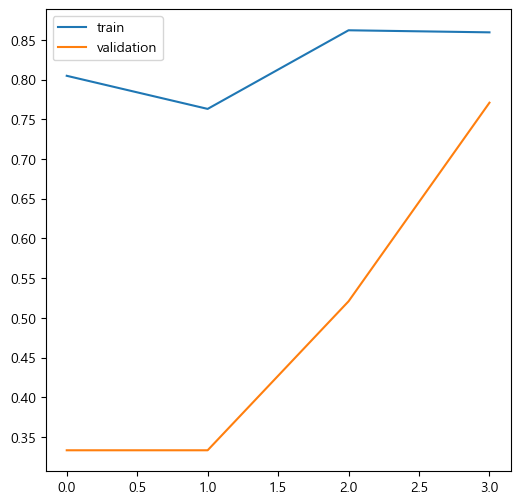

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


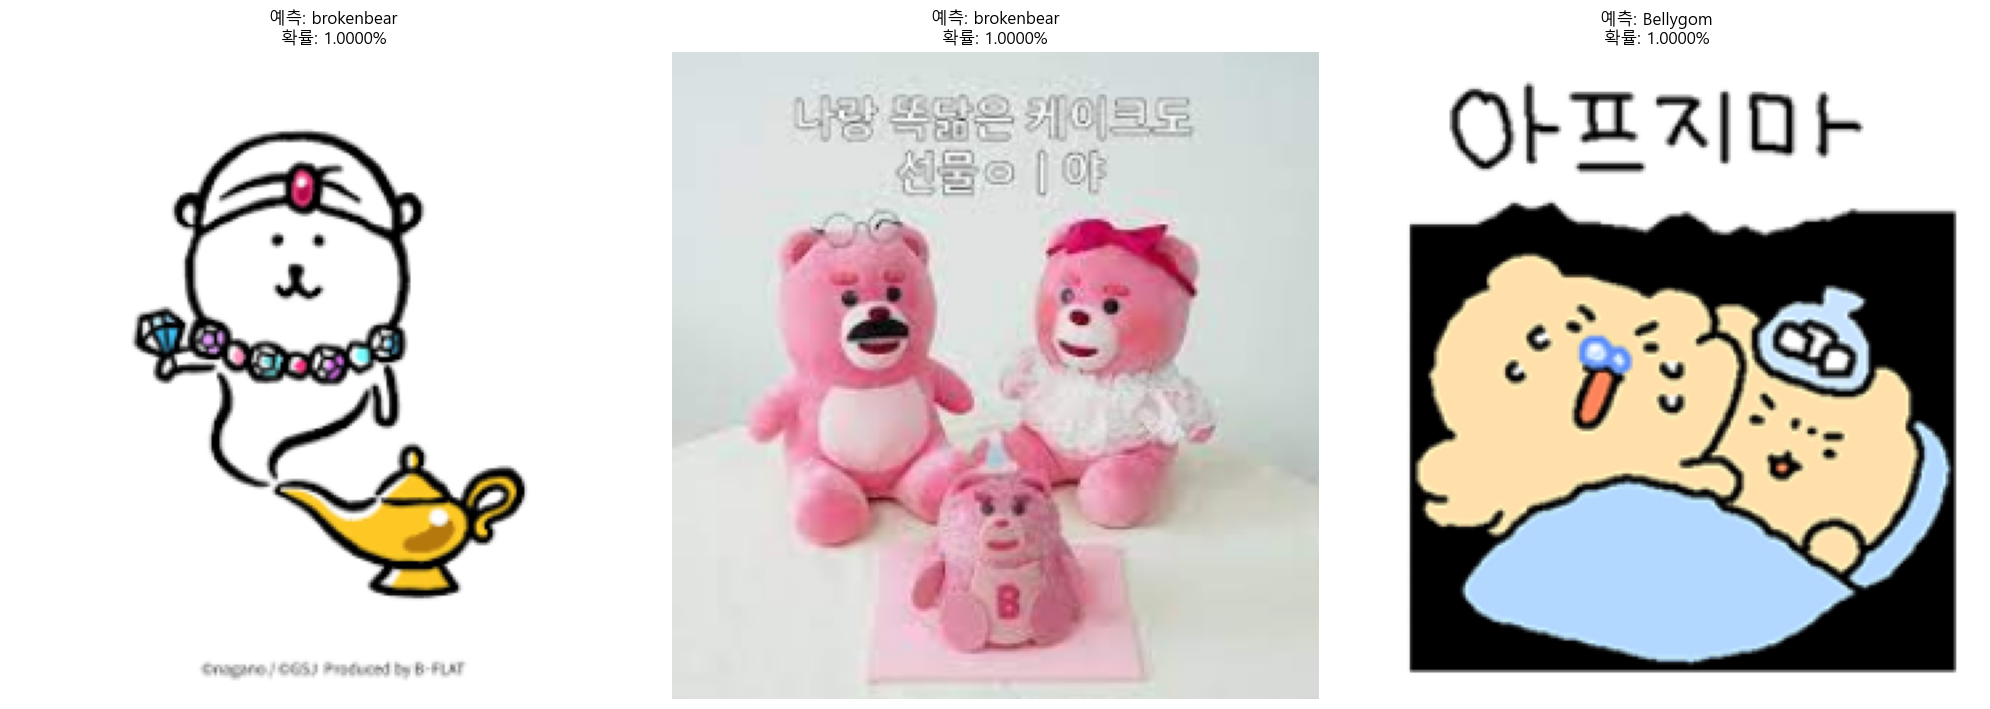

In [47]:
predict_show_images(files_batch, ncols=3, nrows=1, IMAGE_SIZE=IMAGE_SIZE)

### 🌟 3Cycle

In [48]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2 # 작은 장치에서도 성능을 끌어올릴 수 있는 모델

# 모델 생성 함수 선언
# model_name: 사전 훈련 모델 이름, verbose: 모델 요약 출력 여부
def create_model(model_name='vgg16', verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output

    # 분류기
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # hidden layer: 뉴런과 ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)

    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # output layer: 3개의 뉴런과 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(3, activation='softmax', name='output')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=input_tensor, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
    
    return model

In [50]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [51]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'vgg16', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'vgg16', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'vgg16', shuffle=False)

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/3cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [53]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='vgg16', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 61, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,740,491 (56.23 MB)

 Trainable params: 14,740,491 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - acc: 0.3270 - loss: 33.4381 - val_acc: 0.3333 - val_loss: 1.0950 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 328s 7s/step - acc: 0.3892 - loss: 1.0640 - val_acc: 0.5521 - val_loss: 0.8877 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - acc: 0.5683 - loss: 0.9092 - val_acc: 0.3542 - val_loss: 0.9419 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.6112 - loss: 0.7281 - val_acc: 0.5104 - val_loss: 0.8886 - learning_rate: 0.0010
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.6143 - loss: 0.7086 - val_acc: 0.6562 - val_loss: 0.6766 - learning_rate: 1.0000e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - acc: 0.6502 - loss: 0.6075 - val_acc: 0.6250 - val_loss: 0.6185 - learning_rate: 1.0000e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - acc: 0.6823 - loss: 0.5720 - val_acc: 0.6771 - val_loss: 0.5588 - learning_rate: 1.0000e-04
Epoch 

In [55]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 678ms/step - acc: 0.9731 - loss: 0.2072


[0.31433460116386414, 0.9583333134651184]

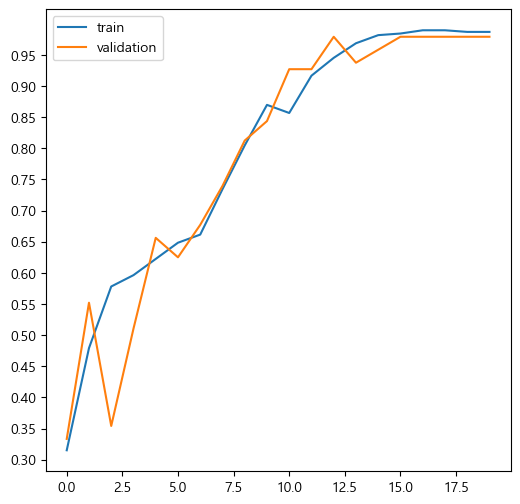

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


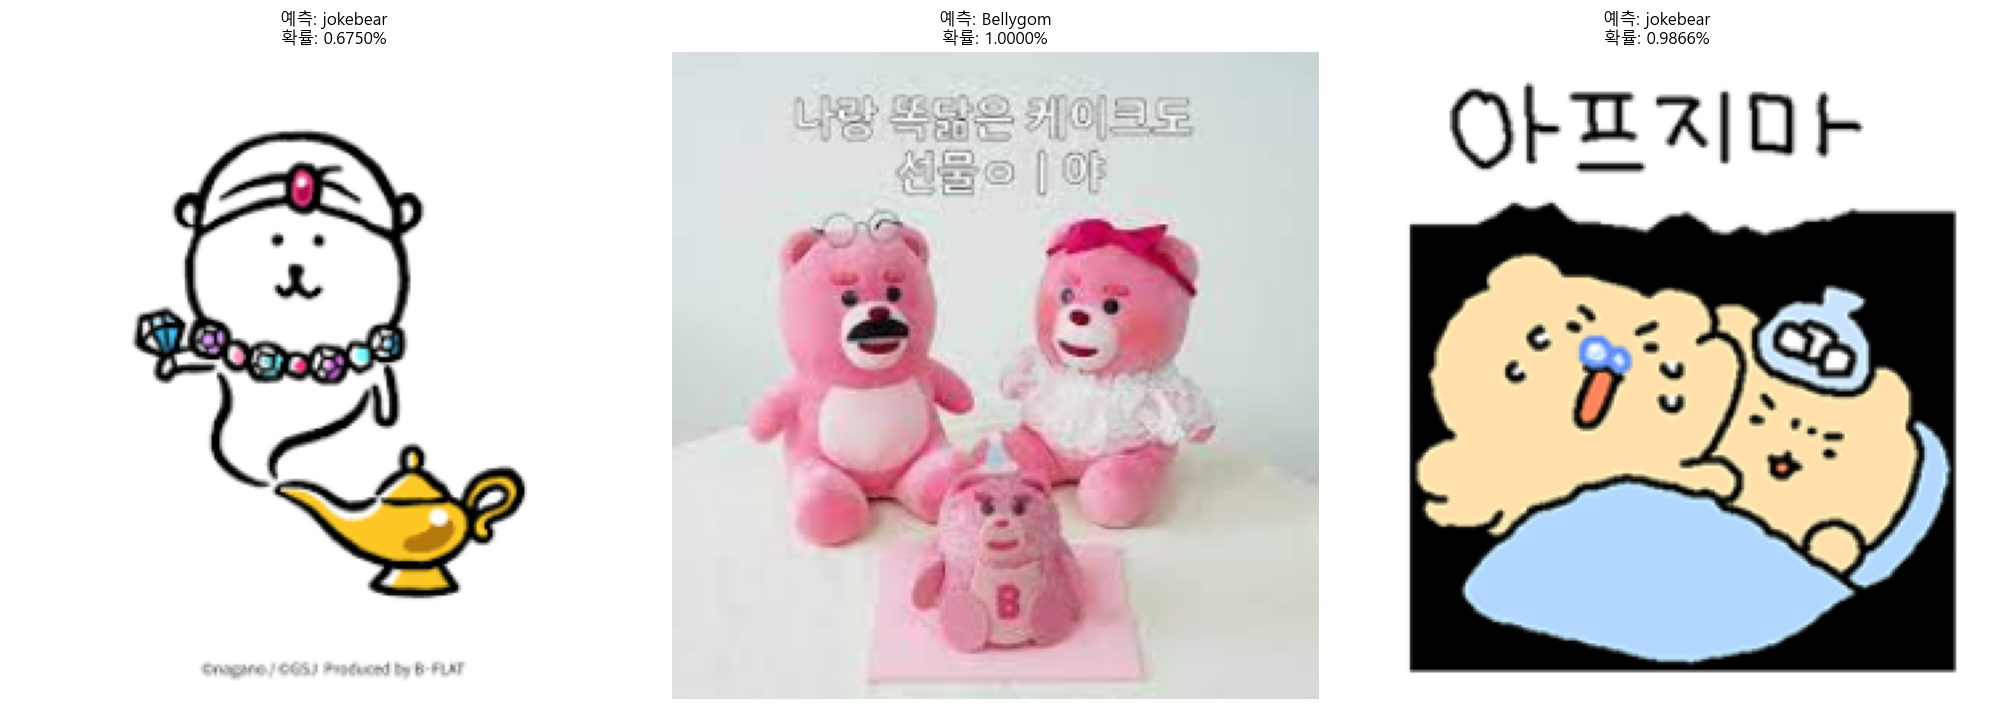

In [57]:
predict_show_images(files_batch, ncols=3, nrows=1, IMAGE_SIZE=IMAGE_SIZE)

### 🌟 4Cycle

In [58]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'xception', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'xception', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'xception', shuffle=False)

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/4cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [60]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='xception', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 20,964,083 (79.97 MB)

 Trainable params: 20,909,555 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [61]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - acc: 0.6577 - loss: 0.6893 - val_acc: 0.9583 - val_loss: 0.2082 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.9169 - loss: 0.3202 - val_acc: 0.6562 - val_loss: 8.1367 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.8564 - loss: 0.4369 - val_acc: 0.9062 - val_loss: 1.6613 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - acc: 0.9029 - loss: 0.3406 - val_acc: 0.9688 - val_loss: 0.0625 - learning_rate: 1.0000e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - acc: 0.9565 - loss: 0.1963 - val_acc: 0.9792 - val_loss: 0.0414 - learning_rate: 1.0000e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - acc: 0.9698 - loss: 0.1875 - val_acc: 0.9896 - val_loss: 0.0374 - learning_rate: 1.0000e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - acc: 0.9396 - loss: 0.2117 - val_acc: 1.0000 - val_loss: 0.0631 - learning_rate: 1.0000e-04
Epo

In [62]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 464ms/step - acc: 1.0000 - loss: 0.0067


[0.0069056968204677105, 1.0]

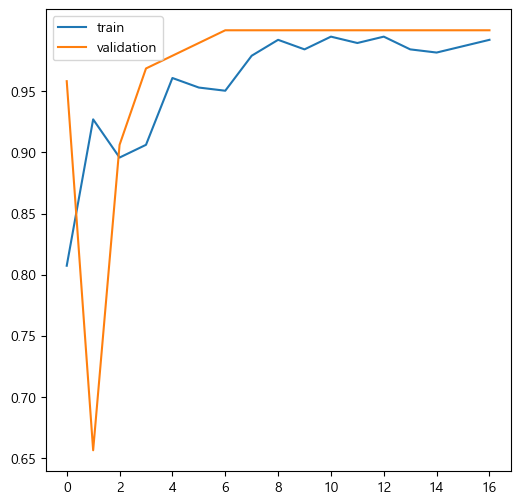

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


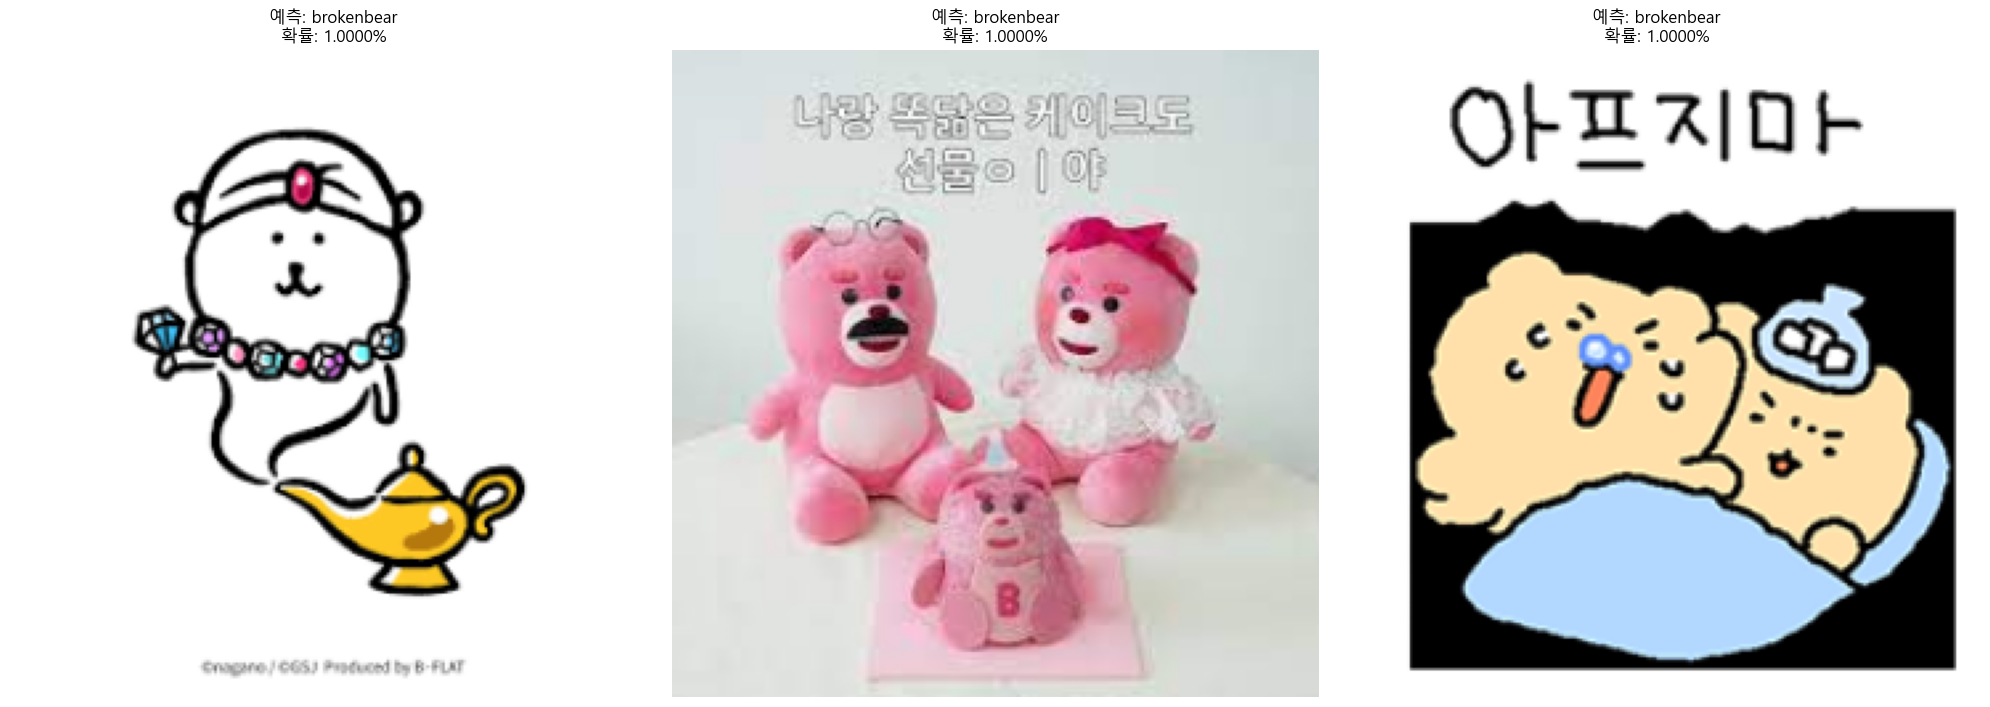

In [64]:
predict_show_images(files_batch, ncols=3, nrows=1, IMAGE_SIZE=IMAGE_SIZE)

### 🌟 5ycle

In [65]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [66]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [67]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/5cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [69]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='mobilenet', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\LEGION\AppData\Local\Temp\ipykernel_23264\1980531665.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [70]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer_8 trainable: False
2 . Conv1 trainable: False
3 . bn_Conv1 trainable: False
4 . Conv1_relu trainable: False
5 . expanded_conv_depthwise trainable: False
6 . expanded_conv_depthwise_BN trainable: False
7 . expanded_conv_depthwise_relu trainable: False
8 . expanded_conv_project trainable: False
9 . expanded_conv_project_BN trainable: False
10 . block_1_expand trainable: False
11 . block_1_expand_BN trainable: False
12 . block_1_expand_relu trainable: False
13 . block_1_pad trainable: False
14 . block_1_depthwise trainable: False
15 . block_1_depthwise_BN trainable: False
16 . block_1_depthwise_relu trainable: False
17 . block_1_project trainable: False
18 . block_1_project_BN trainable: False
19 . block_2_expand trainable: False
20 . block_2_expand_BN trainable: False
21 . block_2_expand_relu trainable: False
22 . block_2_depthwise trainable: False
23 . block_2_depthwise_BN trainable: False
24 . block_2_depthwise_relu trainable: False
25 . block_2_project trainable: False

In [71]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras import layers
import albumentations as A

# fine tuning 함수 선언
def fine_tune(datas, model_name, aug):
    # 반복 횟수
    FIRST_EPOCHS = 50
    SECOND_EPOCHS = 50

    # Unpacking (데이터 분리)
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    # Dataset class로 객체 생성
    train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
    validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
    test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
  
    # 모델 생성 함수를 사용하여 모델 생성
    model = create_model(model_name='mobilenet', verbose=True)
    
    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze (분류기 빼고 모두 freeze)
    for layer in model.layers[:-5]:
        layer.trainable = False

    # 1차 훈련
    history = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=FIRST_EPOCHS, 
                        validation_data=validation_dataset,
                        callbacks=[mcp_cb, rlr_cb, ely_cb])

    # 배치 정규화(BatchNormalization)만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    for layer in model.layers[:27]:
        layer.trainable = False

    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])

    # 2차 훈련
    history = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=SECOND_EPOCHS,
                        validation_data=validation_dataset, 
                        callbacks=[mcp_cb, rlr_cb, ely_cb])
    
    return model, history

In [72]:
# fine tuning 함수 호출하여 미세 조정 진행
model, history = fine_tune((train_file_paths, train_targets,
                            validation_file_paths, validation_targets,
                            test_file_paths, test_targets),
                           'mobilenet',
                           aug)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_23264\1980531665.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - acc: 0.4507 - loss: 1.5606 - val_acc: 0.8333 - val_loss: 0.4429 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - acc: 0.7298 - loss: 0.7066 - val_acc: 0.9271 - val_loss: 0.2608 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - acc: 0.8611 - loss: 0.3806 - val_acc: 0.9375 - val_loss: 0.1889 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - acc: 0.9217 - loss: 0.2597 - val_acc: 0.9375 - val_loss: 0.1536 - learning_rate: 0.0010
Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 26s 339ms/step - acc: 0.9114 - loss: 0.2168 - val_acc: 0.9479 - val_loss: 0.1199 - learning_rate: 1.0000e-05
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - acc: 0.9169 - loss: 0.2281 - val_acc: 0.9896 - val_loss: 0.0832 - learning_rate: 1.0000e-05
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 307ms/step - acc: 0.9664 - loss: 0.0953 - val_acc: 0.9792 - val_loss: 0.0740 - learning_rate

In [73]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - acc: 0.9355 - loss: 0.1045


[0.08566544950008392, 0.9416666626930237]

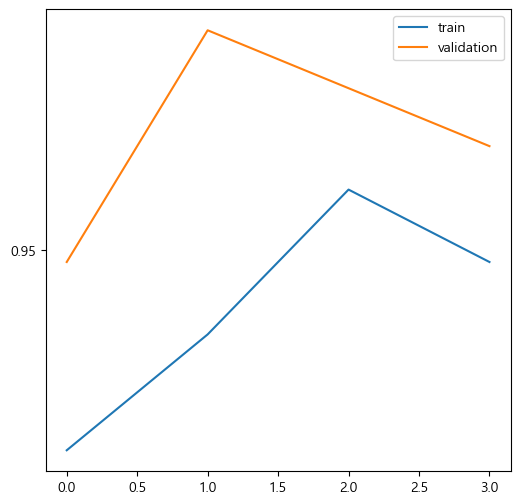

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


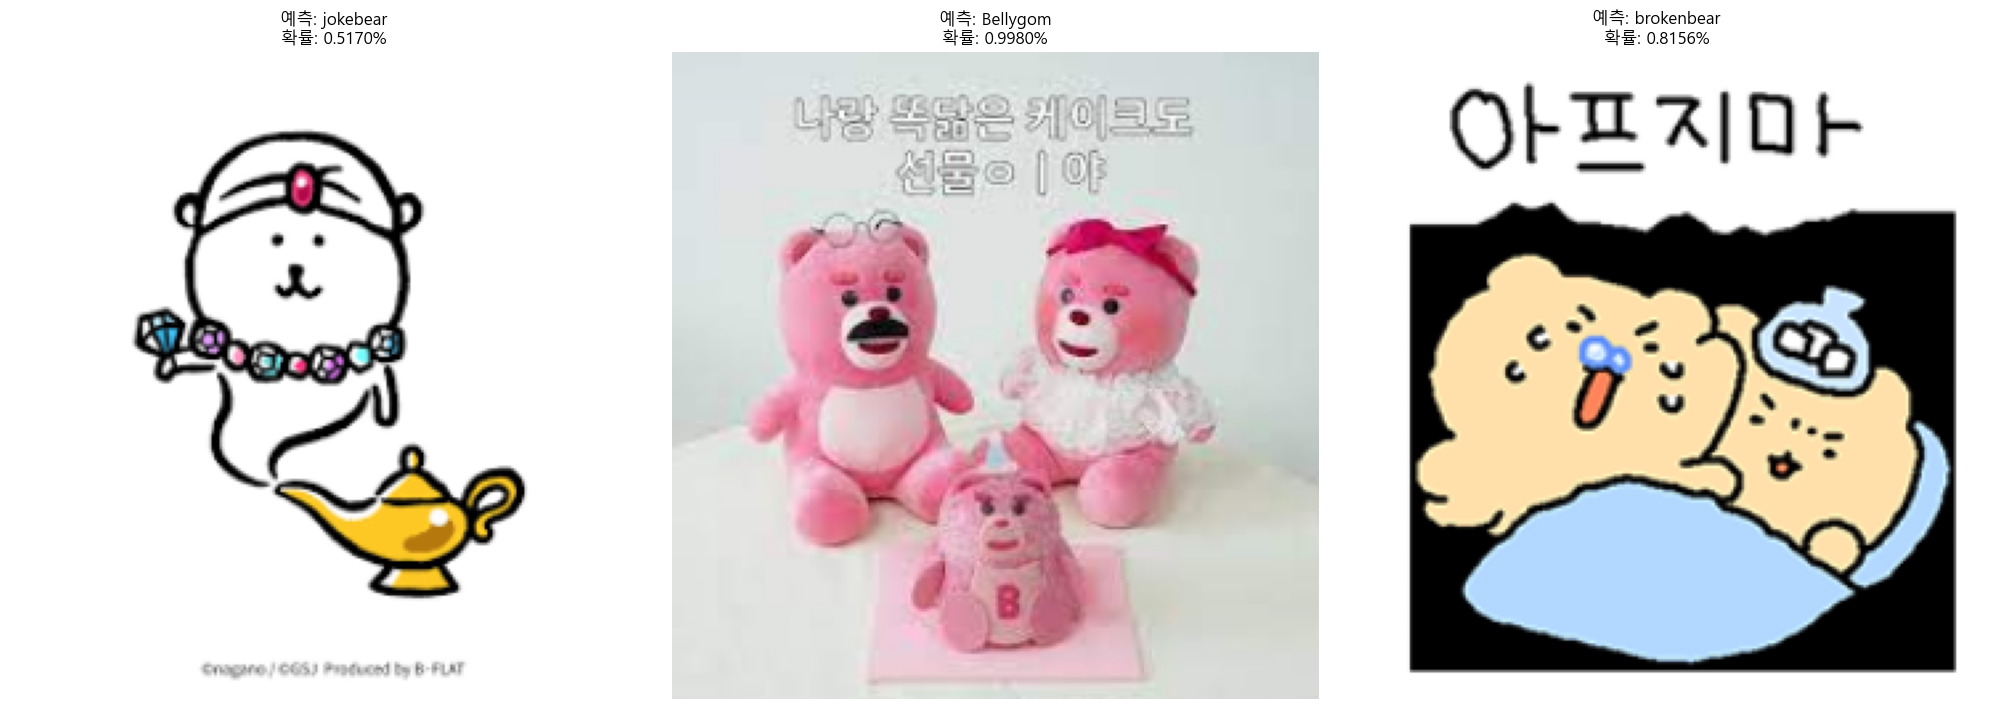

In [75]:
predict_show_images(files_batch, ncols=3, nrows=1, IMAGE_SIZE=IMAGE_SIZE)

### 🌟 6ycle

In [76]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 150
BATCH_SIZE = 16

In [77]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [78]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)

In [79]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/6cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [80]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='mobilenet', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\LEGION\AppData\Local\Temp\ipykernel_23264\1980531665.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 75, 75, 32)        │             864 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 75, 75, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 75, 75, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 75, 75, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 75, 75, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 75, 75, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 75, 75, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 75, 75, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 75, 75, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 75, 75, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 75, 75, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 77, 77, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 38, 38, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [81]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer_10 trainable: False
2 . Conv1 trainable: False
3 . bn_Conv1 trainable: False
4 . Conv1_relu trainable: False
5 . expanded_conv_depthwise trainable: False
6 . expanded_conv_depthwise_BN trainable: False
7 . expanded_conv_depthwise_relu trainable: False
8 . expanded_conv_project trainable: False
9 . expanded_conv_project_BN trainable: False
10 . block_1_expand trainable: False
11 . block_1_expand_BN trainable: False
12 . block_1_expand_relu trainable: False
13 . block_1_pad trainable: False
14 . block_1_depthwise trainable: False
15 . block_1_depthwise_BN trainable: False
16 . block_1_depthwise_relu trainable: False
17 . block_1_project trainable: False
18 . block_1_project_BN trainable: False
19 . block_2_expand trainable: False
20 . block_2_expand_BN trainable: False
21 . block_2_expand_relu trainable: False
22 . block_2_depthwise trainable: False
23 . block_2_depthwise_BN trainable: False
24 . block_2_depthwise_relu trainable: False
25 . block_2_project trainable: Fals

In [82]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras import layers
import albumentations as A

# fine tuning 함수 선언
def fine_tune(datas, model_name, aug):
    # 반복 횟수
    FIRST_EPOCHS = 50
    SECOND_EPOCHS = 50

    # Unpacking (데이터 분리)
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    # Dataset class로 객체 생성
    train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
    validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
    test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
  
    # 모델 생성 함수를 사용하여 모델 생성
    model = create_model(model_name='mobilenet', verbose=True)
    
    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze (분류기 빼고 모두 freeze)
    for layer in model.layers[:-5]:
        layer.trainable = False

    # 1차 훈련
    history = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=FIRST_EPOCHS, 
                        validation_data=validation_dataset,
                        callbacks=[mcp_cb, rlr_cb, ely_cb])

    # 배치 정규화(BatchNormalization)만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    for layer in model.layers[:27]:
        layer.trainable = False

    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])

    # 2차 훈련
    history = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=SECOND_EPOCHS,
                        validation_data=validation_dataset, 
                        callbacks=[mcp_cb, rlr_cb, ely_cb])
    
    return model, history

In [83]:
# fine tuning 함수 호출하여 미세 조정 진행
model, history = fine_tune((train_file_paths, train_targets,
                            validation_file_paths, validation_targets,
                            test_file_paths, test_targets),
                           'mobilenet',
                           aug)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_23264\1980531665.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 75, 75, 32)        │             864 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 75, 75, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 75, 75, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 75, 75, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 75, 75, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 75, 75, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 75, 75, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 75, 75, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 75, 75, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 75, 75, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 75, 75, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 77, 77, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 38, 38, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step - acc: 0.4593 - loss: 1.6063 - val_acc: 0.8542 - val_loss: 0.5021 - learning_rate: 0.0010
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - acc: 0.7439 - loss: 0.5984 - val_acc: 0.8854 - val_loss: 0.3704 - learning_rate: 0.0010
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - acc: 0.8175 - loss: 0.5103 - val_acc: 0.8750 - val_loss: 0.3087 - learning_rate: 0.0010
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - acc: 0.8159 - loss: 0.4692 - val_acc: 0.8958 - val_loss: 0.2544 - learning_rate: 0.0010
Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 394ms/step - acc: 0.8323 - loss: 0.3659 - val_acc: 0.9375 - val_loss: 0.1999 - learning_rate: 1.0000e-05
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - acc: 0.9182 - loss: 0.1928 - val_acc: 0.9375 - val_loss: 0.1787 - learning_rate: 1.0000e-05
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - acc: 0.9160 - loss: 0.2028 - val_acc: 0.9271 - val_loss: 0.1465 - learning_rate: 1.0

In [84]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - acc: 0.9623 - loss: 0.0998


[0.11895467340946198, 0.9583333134651184]

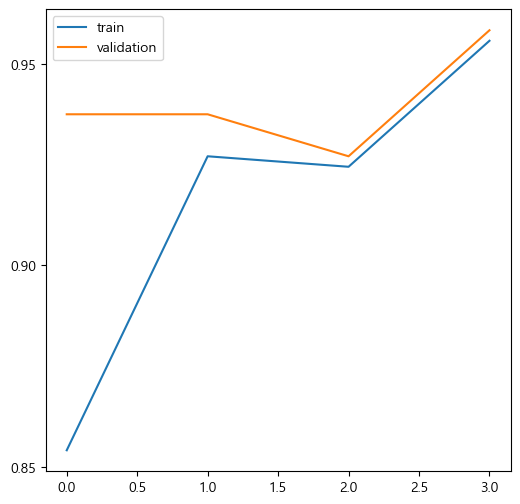

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


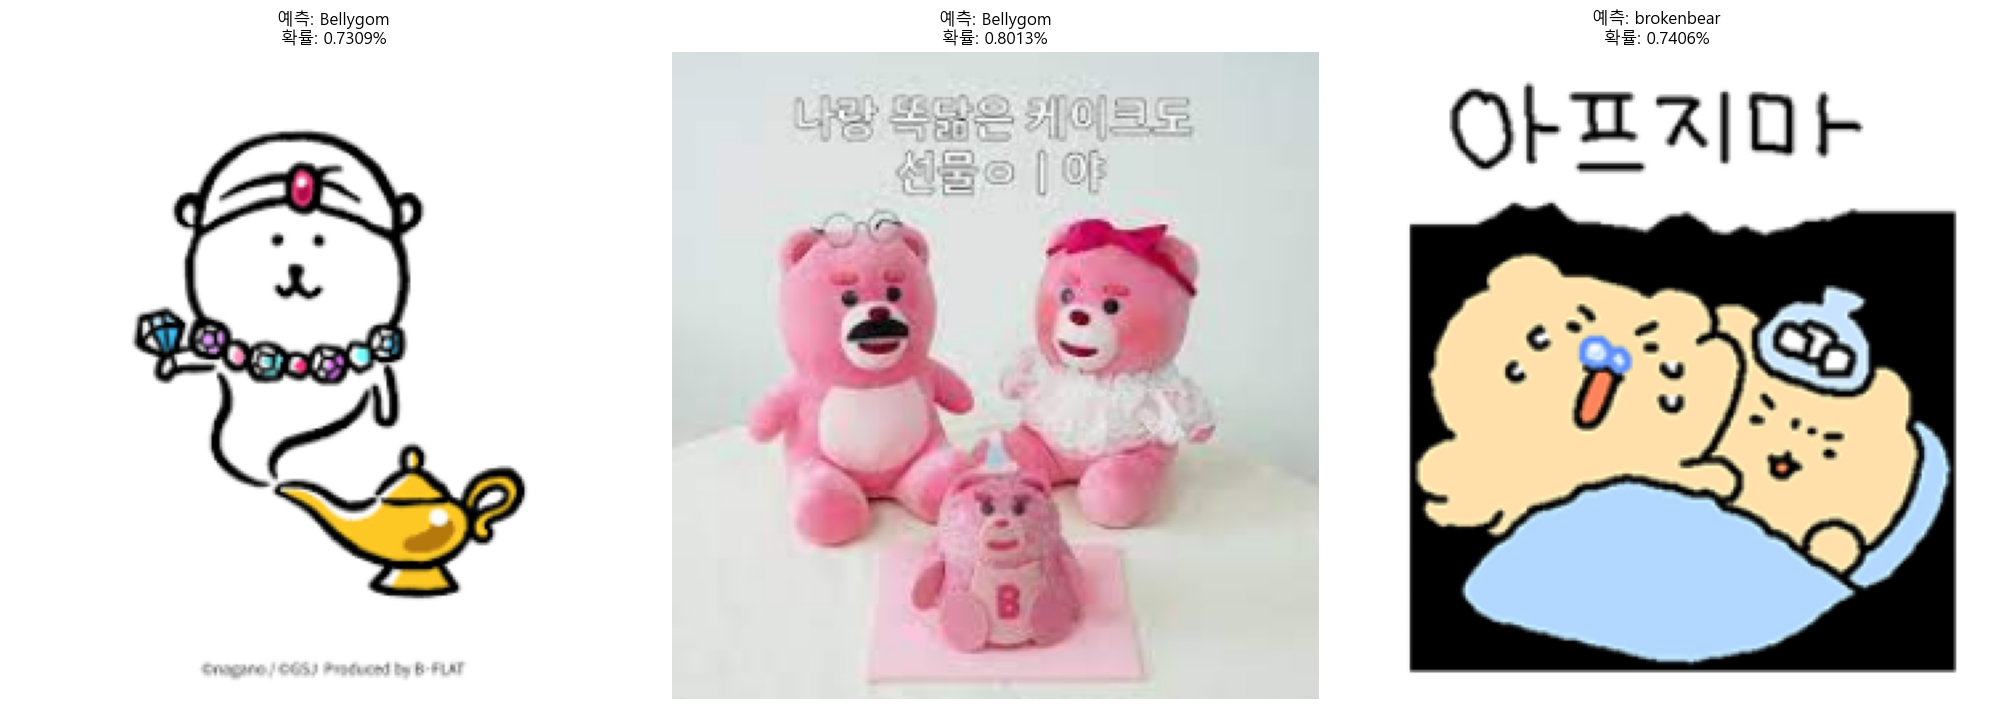

In [86]:
predict_show_images(files_batch, ncols=3, nrows=1, IMAGE_SIZE=IMAGE_SIZE)